In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
ld = load_digits()

In [3]:
from sklearn.neighbors import KNeighborsClassifier 

In [5]:
from sklearn.model_selection import GridSearchCV,train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(ld.data, ld.target, test_size=0.2, random_state=1)


In [48]:
kn = KNeighborsClassifier(n_neighbors=3)

In [49]:
kn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
kn.score(X_test, y_test)

0.9944444444444445

In [51]:
y_predicted = kn.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix

In [55]:
cm = confusion_matrix(y_test,y_predicted)

Text(58.222222222222214, 0.5, 'Truth')

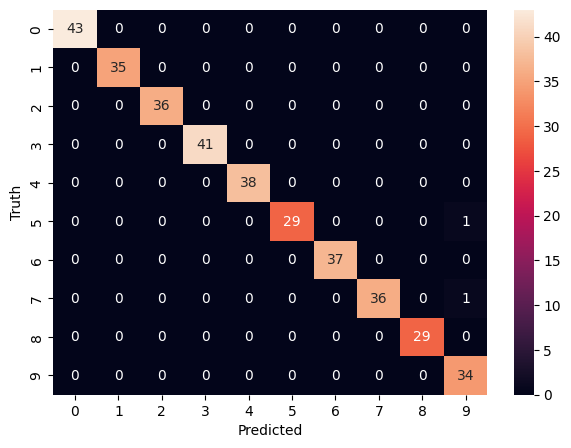

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
parm = {'n_neighbors':[1,2,3,4,5,10,15]}


In [43]:
clf = GridSearchCV(KNeighborsClassifier(), parm, cv=10)

In [44]:
clf.fit(ld.data,ld.target)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 10, 15]})

In [45]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000736,0.000495,0.003723,0.000753,1,{'n_neighbors': 1},0.933333,0.994444,0.972222,0.972222,0.966667,0.983333,0.994444,0.988827,0.977654,0.966480,0.974963,0.017080,2
1,0.000700,0.000458,0.003402,0.000490,2,{'n_neighbors': 2},0.938889,0.988889,0.988889,0.961111,0.961111,0.983333,0.988889,0.977654,0.977654,0.977654,0.974407,0.015348,3
2,0.000400,0.000490,0.003399,0.000487,3,{'n_neighbors': 3},0.938889,1.000000,0.988889,0.972222,0.966667,0.977778,0.983333,0.983240,0.983240,0.972067,0.976633,0.015473,1
3,0.000099,0.000297,0.003444,0.000463,4,{'n_neighbors': 4},0.933333,0.983333,0.983333,0.961111,0.966667,0.983333,0.983333,0.977654,0.983240,0.966480,0.972182,0.015311,4
4,0.000500,0.000501,0.002800,0.000403,5,{'n_neighbors': 5},0.927778,0.983333,0.977778,0.955556,0.972222,0.972222,0.988889,0.983240,0.983240,0.966480,0.971074,0.017169,5
5,0.000500,0.000500,0.003099,0.000300,10,{'n_neighbors': 10},0.916667,0.961111,0.972222,0.938889,0.966667,0.983333,0.988889,0.977654,0.960894,0.955307,0.962163,0.020458,6
6,0.000400,0.000490,0.003202,0.000399,15,{'n_neighbors': 15},0.916667,0.966667,0.977778,0.944444,0.977778,0.972222,0.983333,0.983240,0.944134,0.955307,0.962157,0.020634,7


In [46]:
clf.best_score_

np.float64(0.9766325263811299)

In [47]:
clf.best_params_

{'n_neighbors': 3}